# Importing Libraries

In [ ]:
# Import 3rd party libraries
import os
import json
import requests
import numpy as np
import pandas as pd
import seaborn as sns
import geopandas as gpd
import matplotlib.pyplot as plt

# importing geopy library and Nominatim class
from geopandas.tools import geocode
from geopy.geocoders import Nominatim

# Importing folium for visualization
import folium
from folium import Marker
from folium import Icon
from folium import CircleMarker

# Configure Notebook
%matplotlib inline
plt.style.use('fivethirtyeight')
sns.set_context("notebook")
import warnings
warnings.filterwarnings('ignore')

#### Install additional Packages

In [ ]:
!pip install geopy
!pip install folium

In [273]:
plt.style.use('ggplot')

# Review the injection site and drop box locations

Begin exploration by reading the injection_site_locations.csv and needle_dropbox_locations.csv

The cvs's were derived from web scraping and HTML parsing from the "City of Toronto Web Parsing" notebook.

In [305]:
# Read the files into dataframes
needle_locations = pd.read_csv('injection_site_locations.csv')
injection_locations = pd.read_csv('needle_dropbox_locations.csv')

In [306]:
# Review the dataframe
needle_locations.head()

,Location Name,Address
0,Fred Victor,139 Jarvis St.
1,Moss Park CTS,134 Sherbourne St.
2,Parkdale Queen West Community Health Centre,168 Bathurst St.
3,Parkdale Queen West Community Health Centre,1229 Queen St. W.
4,"Regent Park Bevel Up CTS Site, Regent Park Com...",465 Dundas St. E.


In [307]:
# Review the dataframe
injection_locations.tail()

,Location Name,Address
38,Toronto Public Library - Fort York,190 Fort York Boulevard
39,Toronto Public Library - Lillian H. Smith,239 College Street
40,Toronto Public Library - Northern District,40 Orchard View Boulevard
41,Toronto Public Library - Parliament,269 Gerrard Street East
42,Toronto Public Library - Sanderson,327 Bathurst Street


In [308]:
# Concatenate the dataframes into one
# needle_locations= pd.concat([needle_locations,injection_locations], ignore_index=True)
# needle_locations.tail()

In [309]:
# Delete
# calling the Nominatim tool and create Nominatim class
loc = Nominatim(user_agent="Geopy Library")

# entering the location name
getLoc = loc.geocode("1229 Queen St. W.")

# printing address
print(getLoc.address)

# printing latitude and longitude
# print("Latitude = ", getLoc.latitude, "\n")
# print("Longitude = ", getLoc.longitude)

Parkdale Queen West Community Health Centre, 1229, Queen Street West, Little Tibet, Parkdale—High Park, Old Toronto, Toronto, Golden Horseshoe, Ontario, M6K 0B9, Canada


We must add "Toronto" to the address so if the address appears in a different location, Nominatim can locate the Toronto address.

In [310]:
# Add the term "Toronto" to the address
needle_locations['Address'] = needle_locations['Address'] + " Toronto"
injection_locations['Address'] = injection_locations['Address'] + " Toronto"

In [311]:
# Call the geocoding service Nominatim
locator = Nominatim(user_agent="Geopy Library")

# Function to output the Latitude
def address_to_lat(address):

    # Increase timeout due to slow running
    Location = locator.geocode(address, timeout=10)

    return Location.latitude

# Function to output the Longitude
def address_to_lon(address):

    # Increase timeout due to slow running
    Location = locator.geocode(address, timeout=10)

    return Location.longitude

# Apply the functions to the "Address" columns in the dataframe to get the latitude and logitude in seperate columns
needle_locations['Latitude']=needle_locations['Address'].apply(lambda x: address_to_lat(x))
needle_locations['Longitude']=needle_locations['Address'].apply(lambda x: address_to_lon(x))

injection_locations['Latitude']=injection_locations['Address'].apply(lambda x: address_to_lat(x))
injection_locations['Longitude']=injection_locations['Address'].apply(lambda x: address_to_lon(x))


Lets review the new columns in the dataframe.

In [312]:
needle_locations.head()

,Location Name,Address,Latitude,Longitude
0,Fred Victor,139 Jarvis St. Toronto,43.653638,-79.373080
1,Moss Park CTS,134 Sherbourne St. Toronto,43.650110,-79.367883
2,Parkdale Queen West Community Health Centre,168 Bathurst St. Toronto,43.646596,-79.404186
3,Parkdale Queen West Community Health Centre,1229 Queen St. W. Toronto,43.641821,-79.429519
4,"Regent Park Bevel Up CTS Site, Regent Park Com...",465 Dundas St. E. Toronto,43.659435,-79.365355


In [313]:
injection_locations.head()

,Location Name,Address,Latitude,Longitude
0,The Works,277 Victoria St. Toronto,43.656532,-79.379324
1,Casey House,119 Isabella St. Toronto,43.667948,-79.383837
2,Dixon Hall,2714 Danforth Ave. Toronto,43.689113,-79.298146
3,Eva's Satelite,25 Canterbury Place Toronto,43.772806,-79.414749
4,Fred Victor,145 Queen St. E. Toronto,43.653523,-79.372693


Looks correct, lets plot it.

In [314]:
# Create a map of Toronto
map = folium.Map(location=[43.6426, -79.3871], 
                   tiles='cartodbpositron', 
                   zoom_start=11)
# Combine the Lat and Lon columns to become coordinates
injection_site_coord = list(zip(injection_locations['Latitude'], injection_locations['Longitude']))
needle_drop_coord = list(zip(needle_locations['Latitude'], needle_locations['Longitude']))

# Add points to the map
for lat, lon in injection_site_coord:
    CircleMarker([lat, lon], radius=4, color='red', fill=True, fill_color='red', fill_opacity=1).add_to(map)
for lat, lon in needle_drop_coord:
    CircleMarker([lat, lon], radius=4, color='blue', fill=True, fill_color='blue', fill_opacity=1).add_to(map)

map

# Review the neighbourhoods geodata

Read the toronto_neighbourhoods.shp file from assignment 5 to explore the neighbourhoods.

We want to do EDA at the neighbourhood level, considering external factors to the property price.

In [315]:
# Read and view the shape file
neighbourhoods = gpd.read_file('toronto_neighbourhoods.shp')
neighbourhoods.head()

,FIELD_1,FIELD_2,FIELD_3,FIELD_4,FIELD_5,FIELD_6,FIELD_7,FIELD_8,FIELD_9,FIELD_10,FIELD_11,FIELD_12,FIELD_13,FIELD_14,FIELD_15,geometry
0,2101,25886861,25926662,49885,94,94,Wychwood (94),Wychwood (94),None,None,-79.425515,43.676919,16491505,3.217960e+06,7515.779658,"POLYGON ((-79.43592 43.68015, -79.43492 43.680..."
1,2102,25886820,25926663,49885,100,100,Yonge-Eglinton (100),Yonge-Eglinton (100),None,None,-79.403590,43.704689,16491521,3.160334e+06,7872.021074,"POLYGON ((-79.41096 43.70408, -79.40962 43.704..."
2,2103,25886834,25926664,49885,97,97,Yonge-St.Clair (97),Yonge-St.Clair (97),None,None,-79.397871,43.687859,16491537,2.222464e+06,8130.411276,"POLYGON ((-79.39119 43.68108, -79.39141 43.680..."
3,2104,25886593,25926665,49885,27,27,York University Heights (27),York University Heights (27),None,None,-79.488883,43.765736,16491553,2.541821e+07,25632.335242,"POLYGON ((-79.50529 43.75987, -79.50488 43.759..."
4,2105,25886688,25926666,49885,31,31,Yorkdale-Glen Park (31),Yorkdale-Glen Park (31),None,None,-79.457108,43.714672,16491569,1.156669e+07,13953.408098,"POLYGON ((-79.43969 43.70561, -79.44011 43.705..."


We are only interested in the "geometry" column and "FIELD_8" column, which is the neighbourhood name.

In [316]:
# Extract the two columns from neighbourhoods
neighbourhoods = neighbourhoods[['FIELD_8', 'geometry']]

# Rename the column
neighbourhoods = neighbourhoods.rename(columns={'FIELD_8':'neighbourhood_name'})

# Split the entries in "neighbourhoood_name" and set the new entry to the first index
neighbourhoods['neighbourhood_name'] = neighbourhoods['neighbourhood_name'].apply(lambda word: word.split("(")[0])

# View GeoDataFrame
neighbourhoods.head()

,neighbourhood_name,geometry
0,Wychwood,"POLYGON ((-79.43592 43.68015, -79.43492 43.680..."
1,Yonge-Eglinton,"POLYGON ((-79.41096 43.70408, -79.40962 43.704..."
2,Yonge-St.Clair,"POLYGON ((-79.39119 43.68108, -79.39141 43.680..."
3,York University Heights,"POLYGON ((-79.50529 43.75987, -79.50488 43.759..."
4,Yorkdale-Glen Park,"POLYGON ((-79.43969 43.70561, -79.44011 43.705..."


Now that we have the neighbourhoods GeoDataFrame, we need to convert the needle_locations and injection_locations DataFrames into GeoDataFrames so we can locate the sites within the neighbourhood polygons. This will create a new "geomatry" column with the point locations.

In [318]:
# Convert dataframes into a GeoDataFrames by specifying the latitude and longitude
needle_locations_gdf = gpd.GeoDataFrame(needle_locations, 
                                    geometry=gpd.points_from_xy(needle_locations['Longitude'], needle_locations['Latitude']),crs="EPSG:4326")

injection_locations_gdf = gpd.GeoDataFrame(injection_locations, 
                                       geometry=gpd.points_from_xy(injection_locations['Longitude'], injection_locations['Latitude']),crs="EPSG:4326")

# Ensure they use the epsg=26917 CRS 
neighbourhoods_26917=neighbourhoods.to_crs(epsg=26917)
needle_locations_gdf_26917 = needle_locations_gdf.to_crs(epsg=26917)
injection_locations_gdf_26917 = injection_locations_gdf.to_crs(epsg=26917)

In [320]:
# Review the GeoDataFrame for the "geomatry"
injection_locations_gdf_26917.head()

,Location Name,Address,Latitude,Longitude,geometry
0,The Works,277 Victoria St. Toronto,43.656532,-79.379324,POINT (630684.361 4835001.828)
1,Casey House,119 Isabella St. Toronto,43.667948,-79.383837,POINT (630295.700 4836262.696)
2,Dixon Hall,2714 Danforth Ave. Toronto,43.689113,-79.298146,POINT (637156.003 4838751.449)
3,Eva's Satelite,25 Canterbury Place Toronto,43.772806,-79.414749,POINT (627580.785 4847860.583)
4,Fred Victor,145 Queen St. E. Toronto,43.653523,-79.372693,POINT (631225.593 4834678.092)


Plot the location points in the neighbourhood file to see the trends.

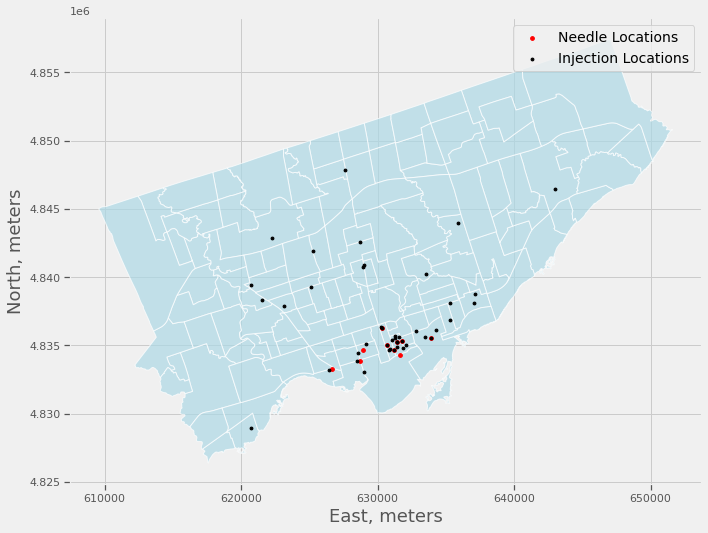

In [395]:
# Plot all three sets of data
ax= neighbourhoods_26917.plot(figsize=(15, 8), edgecolor='w', color='lightblue', alpha=0.7)
needle_locations_gdf_26917.plot(ax=ax, color='red', marker= 'o', label='Needle Locations', markersize=14)
injection_locations_gdf_26917.plot(ax=ax, color='black', marker= 'o', label='Injection Locations', markersize=8)

# Add a legend
plt.legend(fontsize = 14, loc=1)

# Set the axis labels
plt.xlabel('East, meters', fontsize=18)
plt.ylabel('North, meters', fontsize=18)
plt.savefig('plots/injection_site_drop_box_site_over_neighbourhood_map.png', dpi=300)
plt.show()

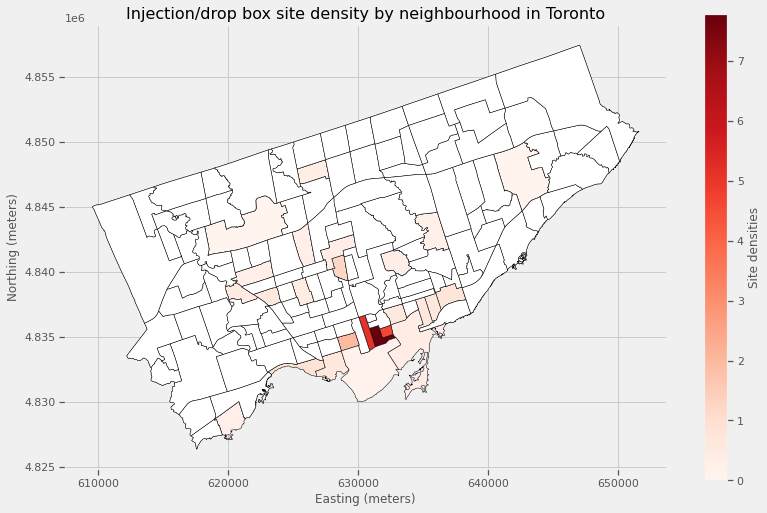

In [396]:
# Plot choropleth map for green space percentage
fig, ax = plt.subplots(figsize=(12, 8))
neighbourhoods_26917.plot(
    column="site_density",  # Use the green space percentage column
    cmap="Reds",  # Color scheme
    linewidth=0.5,  # Line width for ward boundaries
    edgecolor="black",  # Edge color for ward boundaries
    legend=True,  # Add legend
    legend_kwds={"label": "Site densities"},
    ax=ax,  # Axis to plot on
    vmin=0,
    vmax=neighbourhoods_26917['site_density'].max()
)

# Separate zero density areas
mask_zero = neighbourhoods_26917['site_density'] == 0

# Overlay zero density areas in white
neighbourhoods_26917[mask_zero].plot(
    color="white",  # Set color to white for zero density
    linewidth=0.5,  # Line width for boundaries
    edgecolor="black",  # Edge color for boundaries
    ax=ax,  # Axis to plot on
)
plt.title("Injection/drop box site density by neighbourhood in Toronto", fontsize=16)
plt.xlabel("Easting (meters)", fontsize=12)
plt.ylabel("Northing (meters)", fontsize=12)
plt.savefig('plots/choropleth_map_site_density.png', dpi=300)
plt.show()

#### Trends:
It looks like the injection sites are all downtown and the drop boxes are mostly downtown, with some in other neighbourhooods. 

Calculate the area of each neighbourhood in square kilometers  so we can find the density of sites within each neighbourhood.

In [321]:
# Call the geometry.area method to get the area in m2 and divide by 10^6 to convert to km2
neighbourhoods_26917['area'] = round(neighbourhoods_26917.geometry.area / 10 ** 6,3)

neighbourhoods_26917.head()

,neighbourhood_name,geometry,area
0,Wychwood,"POLYGON ((626071.503 4837537.756, 626151.708 4...",1.682
1,Yonge-Eglinton,"POLYGON ((628032.302 4840233.689, 628139.346 4...",1.650
2,Yonge-St.Clair,"POLYGON ((629674.232 4837709.743, 629657.497 4...",1.161
3,York University Heights,"POLYGON ((620320.085 4846288.688, 620352.534 4...",13.247
4,Yorkdale-Glen Park,"POLYGON ((625714.291 4840359.316, 625680.263 4...",6.038


Calcualte the denisty of injection sites or drop boxes per square kilometre.

In [323]:
# Apply the .within() method to each row in the neighbourhoods geodataframe to determine number of sites in each neighbourhood
neighbourhoods_26917['sites'] = neighbourhoods_26917.apply(lambda row: (needle_locations_gdf_26917.geometry.within(row.geometry).sum() + 
                                                            injection_locations_gdf_26917.geometry.within(row.geometry).sum()), axis=1)

# Sort the geodataframe by the stations
neighbourhoods_26917 = neighbourhoods_26917.sort_values(by='sites', ascending = False)

# Divide the number of stations in each neighbourhood by the area of each neighbourhood
neighbourhoods_26917['site_density'] = round(neighbourhoods_26917['sites'] / neighbourhoods_26917['area'],3)

# View GeoDataFrame
neighbourhoods_26917.head(10)

,neighbourhood_name,geometry,area,sites,site_density
18,Moss Park,"POLYGON ((632910.604 4834938.350, 632883.548 4...",1.413,11,7.785
97,Church-Yonge Corridor,"POLYGON ((630881.766 4835659.785, 630893.584 4...",1.365,7,5.128
49,South Riverdale,"POLYGON ((634788.020 4834074.432, 634789.475 4...",10.965,4,0.365
39,Regent Park,"POLYGON ((632697.229 4835190.362, 632679.479 4...",0.650,3,4.615
136,Kensington-Chinatown,"POLYGON ((628713.653 4833925.535, 628698.164 4...",1.535,3,1.954
1,Yonge-Eglinton,"POLYGON ((628032.302 4840233.689, 628139.346 4...",1.650,2,1.212
48,South Parkdale,"POLYGON ((626833.621 4831957.033, 626695.520 4...",2.287,2,0.875
109,East End-Danforth,"POLYGON ((635984.455 4838346.643, 635968.842 4...",2.639,2,0.758
26,Niagara,"POLYGON ((626833.621 4831957.033, 626830.404 4...",3.241,2,0.617
61,Waterfront Communities-The Island,"POLYGON ((630894.760 4833934.115, 630991.159 4...",13.416,2,0.149


Visualize the resutls to see the variance in location density.

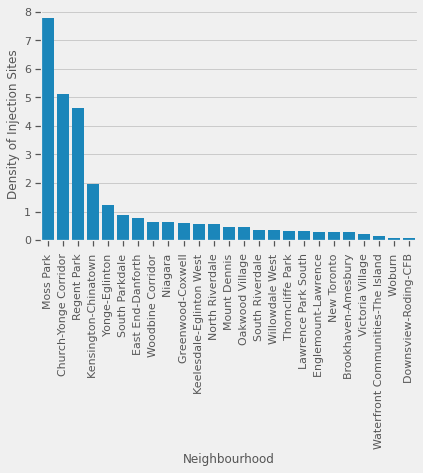

In [ ]:
# Visualize only the neighbourhoods with injeciton or drop box sites
neighbourhoods_with_sites = neighbourhoods_26917[neighbourhoods_26917['sites']>0].sort_values(by='site_density',ascending = False)
sns.barplot(neighbourhoods_with_sites, x='neighbourhood_name', y='site_density')
plt.ylabel('Density of Injection Sites')
plt.xlabel('Neighbourhood')
plt.xticks(rotation=90)
plt.show()

In [ ]:
# Save a csv
neighbourhoods_26917_no_geom = neighbourhoods_26917.drop(columns='geometry')
neighbourhoods_26917_no_geom.to_csv('neighbourhood_injection_density.csv')

# Review the sold properties from Zillow

Read and review the csv and group the properties into neighbourhoods so an average neighbourhood price can be calculated.

In [341]:
# Read and view the zillow_coordinates.csv file into a dataframe
properties = pd.read_csv("zillow_coordinates.csv")
properties.head()

,address,price,link,bedrooms,bathrooms,cleaned_address,Latitude,Longitude
0,"2240 Lake Shore Blvd W #1701, Toronto, ON M8V 0B1","C$710,000",https://www.zillow.com/homedetails/2240-Lake-S...,--,--,"2240 Lake Shore Blvd W. , ON",43.621242,-79.483024
1,"11 Saint Joseph St N, Toronto, ON M4Y 3G4","C$532,000",https://www.zillow.com/homedetails/11-Saint-Jo...,--,--,"11 Saint Joseph St N., ON",29.943809,-90.069620
2,"899 Queen St E #409, Toronto, ON M4M 0C8","C$893,000",https://www.zillow.com/homedetails/899-Queen-S...,--,--,"899 Queen St E. , ON",43.660515,-79.341890
3,"49 E Liberty St #2508, Toronto, ON M6K 0A7","C$620,000",https://www.zillow.com/homedetails/49-E-Libert...,2,1,"49 E. Liberty St , ON",43.638846,-79.412554
4,"91 Drayton Ave, Toronto, ON M4C 3L8",$1.22M,https://www.zillow.com/homedetails/91-Drayton-...,--,--,"91 Drayton Ave, ON",43.681648,-79.318933


The only needed columns are 'price', 'Latitude', and 'Longitude'.

In [342]:
# Extract only the useful columns
properties=properties[['price', 'Latitude', 'Longitude']]
properties.head()

,price,Latitude,Longitude
0,"C$710,000",43.621242,-79.483024
1,"C$532,000",29.943809,-90.069620
2,"C$893,000",43.660515,-79.341890
3,"C$620,000",43.638846,-79.412554
4,$1.22M,43.681648,-79.318933


We must also convert the properties' latitudes and longitudes into GeoDataFrame point locations.

In [343]:
# Convert dataframe into a GeoDataFrame by specifying the latitude and longitude
properties_gdf = gpd.GeoDataFrame(properties, 
                                    geometry=gpd.points_from_xy(properties['Longitude'], properties['Latitude']),crs="EPSG:4326")

# Ensure they use the epsg=26917 CRS
properties_gdf=properties_gdf.to_crs(epsg=26917)

Now, perform spatial analysis to determine which neighbourhood each sold property is in.

In [344]:
# Use .sjoin to determine which neighbouhoods the properties are within
properties_gdf = gpd.sjoin(properties_gdf, neighbourhoods_26917[['geometry','neighbourhood_name']], how='left', op='within')
# Drop the "index_right" column
properties_gdf=properties_gdf.drop(columns=['index_right'])
# View the GeoDataFrame
properties_gdf.head()

,price,Latitude,Longitude,geometry,neighbourhood_name
0,"C$710,000",43.621242,-79.483024,POINT (622393.975 4830924.404),Mimico
1,"C$532,000",29.943809,-90.069620,POINT (-377081.485 3347393.464),NaN
2,"C$893,000",43.660515,-79.341890,POINT (633694.013 4835503.876),South Riverdale
3,"C$620,000",43.638846,-79.412554,POINT (628042.348 4832985.800),Niagara
4,$1.22M,43.681648,-79.318933,POINT (635497.501 4837888.204),Woodbine Corridor


In [345]:
properties_gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Index: 318 entries, 0 to 317
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   price               318 non-null    object  
 1   Latitude            318 non-null    float64 
 2   Longitude           318 non-null    float64 
 3   geometry            318 non-null    geometry
 4   neighbourhood_name  307 non-null    object  
dtypes: float64(2), geometry(1), object(2)
memory usage: 14.9+ KB


Note: The "price" column is currently an object type. To perform EDA with the average neighbourhood selling price, the "price" column must be converted to a numeric value. Clean the data by extracting characters such as "$", "C", ",".

In [346]:
def cleaned_price(price_row):
    # If the price is already a numeric value, return the value
    if isinstance(price_row, (int, float)):
        return price_row
    
    # If the price is a string, clean it
    if isinstance(price_row, str):
        # Remove 'C','$', and ','
        price_row = price_row.replace(',', '')
        price_row = price_row.replace('C', '')
        price_row = price_row.replace('$', '')
        price_row = price_row.strip()
        
        # Check if price contains 'M' for millions or 'K' for thousands
        if 'M' in price_row:
            price_row = float(price_row.replace('M', '')) * 1000000
        elif 'K' in price_row:
            price_row = float(price_row.replace('K', '')) * 1000
        else:
            try:
                # Convert to float if no 'M' or 'K'
                price_row = float(price_row)
            except ValueError:
                # Return Nan if it can't be converted
                price_row = float('nan')
    
    return price_row

# Apply the function to the 'price' column
properties_gdf['price'] = properties_gdf['price'].apply(cleaned_price)

In [347]:
# Vew the updated gdf
properties_gdf.head()

,price,Latitude,Longitude,geometry,neighbourhood_name
0,710000.0,43.621242,-79.483024,POINT (622393.975 4830924.404),Mimico
1,532000.0,29.943809,-90.069620,POINT (-377081.485 3347393.464),NaN
2,893000.0,43.660515,-79.341890,POINT (633694.013 4835503.876),South Riverdale
3,620000.0,43.638846,-79.412554,POINT (628042.348 4832985.800),Niagara
4,1220000.0,43.681648,-79.318933,POINT (635497.501 4837888.204),Woodbine Corridor


Review if any values returned Nan

In [348]:
properties_gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Index: 318 entries, 0 to 317
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   price               310 non-null    float64 
 1   Latitude            318 non-null    float64 
 2   Longitude           318 non-null    float64 
 3   geometry            318 non-null    geometry
 4   neighbourhood_name  307 non-null    object  
dtypes: float64(3), geometry(1), object(1)
memory usage: 14.9+ KB


There are Nan values in "price" and "neighbourhood_name". Remove these rows for further processing.

In [349]:
# Drop Nan rows
properties_gdf=properties_gdf.dropna()

Now that we have a clean dataframe with prices and appropriate neighbourhood names, group the dataframe by the neighbourhood names and take the average of the sold prices for each neighbourhood. The average neighbourhood sold price will account for the variance in size of home, as the price is already a factor of the internal characteristics of the home (size, # of bedrooms, # of bathrooms). This analysis assumes that there is equal proportion of variance in home size accross all neighbourhoods.?????

In [358]:
properties_in_neighbourhoods = properties_gdf.groupby(['neighbourhood_name'])[['price']].mean()
properties_in_neighbourhoods['price'] = round(properties_in_neighbourhoods['price'],0)
properties_in_neighbourhoods

,price
neighbourhood_name,
Agincourt North,990000.0
Agincourt South-Malvern West,1298000.0
Alderwood,1560000.0
Annex,2108571.0
Banbury-Don Mills,1990000.0
...,...
Woodbine Corridor,1277500.0
Woodbine-Lumsden,1370000.0
Wychwood,1620000.0


In [359]:
neighbourhoods_26917

,neighbourhood_name,geometry,area,sites,site_density
18,Moss Park,"POLYGON ((632910.604 4834938.350, 632883.548 4...",1.413,11,7.785
97,Church-Yonge Corridor,"POLYGON ((630881.766 4835659.785, 630893.584 4...",1.365,7,5.128
49,South Riverdale,"POLYGON ((634788.020 4834074.432, 634789.475 4...",10.965,4,0.365
39,Regent Park,"POLYGON ((632697.229 4835190.362, 632679.479 4...",0.650,3,4.615
136,Kensington-Chinatown,"POLYGON ((628713.653 4833925.535, 628698.164 4...",1.535,3,1.954
...,...,...,...,...,...
44,Rouge,"POLYGON ((645047.266 4850853.145, 645043.505 4...",37.535,0,0.000
43,Rosedale-Moore Park,"POLYGON ((631927.964 4837114.033, 631858.871 4...",4.669,0,0.000
42,Roncesvalles,"POLYGON ((626772.235 4833346.641, 626737.437 4...",1.505,0,0.000
41,Rockcliffe-Smythe,"POLYGON ((619956.573 4835478.816, 619940.466 4...",5.071,0,0.000


In [360]:
merged_df=pd.merge(properties_in_neighbourhoods, neighbourhoods_26917, on='neighbourhood_name').drop(columns='geometry')
merged_df.head(30)

,neighbourhood_name,price,area,sites,site_density
0,Agincourt North,990000.0,7.262,0,0.000
1,Agincourt South-Malvern West,1298000.0,7.873,0,0.000
2,Alderwood,1560000.0,4.978,0,0.000
3,Annex,2108571.0,2.790,0,0.000
4,Banbury-Don Mills,1990000.0,10.042,0,0.000
5,Bathurst Manor,1980000.0,4.760,0,0.000
6,Bay Street Corridor,1140000.0,1.809,0,0.000
7,Bayview Village,2050000.0,5.159,0,0.000
8,Bedford Park-Nortown,3133333.0,5.518,0,0.000
9,Bendale,1104500.0,7.457,0,0.000


In [361]:
correlation = merged_df['price'].corr(merged_df['site_density'])
correlation

-0.08565399236130139

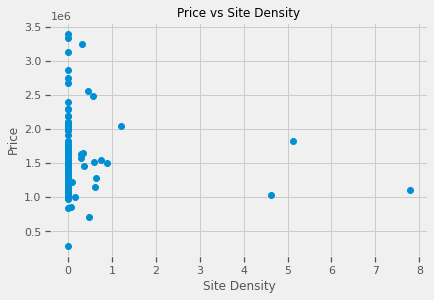

In [363]:
plt.scatter(merged_df['site_density'], merged_df['price'])
plt.xlabel('Site Density')
plt.ylabel('Price')
plt.title('Price vs Site Density')
plt.show()